#BÀI 1: NHẬN DIỆN KHUÔN MẶT BẢN THÂN (ANN)

1. Import thư viện

In [401]:
# thư viện tạo địa chỉ
import os
# thư viện đọc hình ảnh
from PIL import Image
# thư viện để chuyển hình thành array
import numpy as np


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop

import matplotlib.pyplot as plt

2. Tạo catagory thủ công

In [402]:
# tạo catagory
dick={'nguyen':[1,0],'cat':[0,1]}

3. Tạo hàm đọc đỉa chỉ và gán label cho ảnh

In [410]:
# tạo địa chỉ dẫn tới hình ảnh và gán hình ảnh vào biến
def getData(dirData, x):
  for i in os.listdir(dirData):
    i_path=os.path.join(dirData,i) # tạo địa chỉ chỉ tới thư mục
    lst=[]  # tạo list để chứa hình ảnh của từng folder
    for j in os.listdir(i_path):
      j_path=os.path.join(i_path,j) # tạo địa chỉ chỉ tới thư mục
      label=j_path.split('/')[4]
      img=np.array(Image.open(j_path)) # mở hình ảnh, np.array để chuyển thành ma trận giống trong thư viện cifar
      lst.append((img,dick[label])) # thêm hình ảnh vào list
    x.extend(lst) # tách hình ảnh vì append chỉ thêm hình không quan tâm dấu phẩy nên thành 1 khối khối
  return x
  

4. Lấy ảnh từ địa chỉ cho trước

In [524]:
train='drive/MyDrive/Tri tue nhan tao/train'
test='drive/MyDrive/Tri tue nhan tao/test'


x_train=[]
x_test=[]

y_train=[]
y_test=[]

x_train=getData(train,x_train)
x_test=getData(test,x_test)

for i in range (0,3):
  np.random.shuffle(x_train)

print(len(x_train))
print(len(x_test))

64
15


5. Chiết xuất và xử lý dữ liệu từ dữ liệu đã được lấy ra


In [525]:
x_train_1=np.array([x[0] for _, x in enumerate(x_train)])
y_train=np.array([x[1] for _, x in enumerate(x_train)])

x_test_1=np.array([x[0] for _, x in enumerate(x_test)])
y_test=np.array([x[1] for _, x in enumerate(x_test)])

x_pred=x_test_1
y_pred=y_test

x_train_1=x_train_1.astype('float32')
x_test_1=x_test_1.astype('float32')

x_train_1=x_train_1.reshape(64,67500)
x_test_1=x_test_1.reshape(15,67500)

x_train_1/=255
x_test_1/=255

 6. Tạo model

In [526]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(67500,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_184 (Dense)           (None, 512)               34560512  
                                                                 
 dense_185 (Dense)           (None, 512)               262656    
                                                                 
 dense_186 (Dense)           (None, 2)                 1026      
                                                                 
Total params: 34,824,194
Trainable params: 34,824,194
Non-trainable params: 0
_________________________________________________________________


7. Train model

In [527]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
history=model.fit(x_train_1,y_train,
                  batch_size=128,epochs=300,verbose=1) #epochs số lần học

Epoch 1/300
1/1 [==============================] - 0s 478ms/step - loss: 0.6901 - accuracy: 0.4688
Epoch 2/300
1/1 [==============================] - 0s 34ms/step - loss: 169.7142 - accuracy: 0.6250
Epoch 3/300
1/1 [==============================] - 0s 32ms/step - loss: 622.9708 - accuracy: 0.3750
Epoch 4/300
1/1 [==============================] - 0s 34ms/step - loss: 86.9873 - accuracy: 0.3750
Epoch 5/300
1/1 [==============================] - 0s 30ms/step - loss: 51.9325 - accuracy: 0.6250
Epoch 6/300
1/1 [==============================] - 0s 43ms/step - loss: 18.0574 - accuracy: 0.3750
Epoch 7/300
1/1 [==============================] - 0s 31ms/step - loss: 49.2647 - accuracy: 0.6250
Epoch 8/300
1/1 [==============================] - 0s 30ms/step - loss: 2.0710 - accuracy: 0.8438
Epoch 9/300
1/1 [==============================] - 0s 40ms/step - loss: 11.2949 - accuracy: 0.3750
Epoch 10/300
1/1 [==============================] - 0s 34ms/step - loss: 41.6042 - accuracy: 0.6250
Epoch 11

8. Kiểm tra

In [528]:
Score=model.evaluate(x_test_1,y_test,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

Test loss 0.026919182389974594
Test accuary 1.0


In [529]:
model.save('bai1.h5')

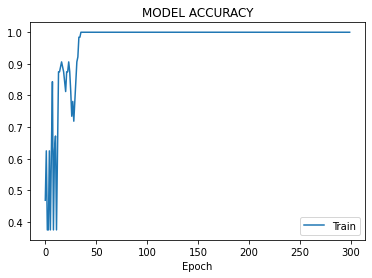

In [530]:
plt.plot(history.history['accuracy'])
plt.title('MODEL ACCURACY')
plt.xlabel('Epoch')
plt.legend(['Train'])
plt.show()

In [531]:
hinh=['yes','no']

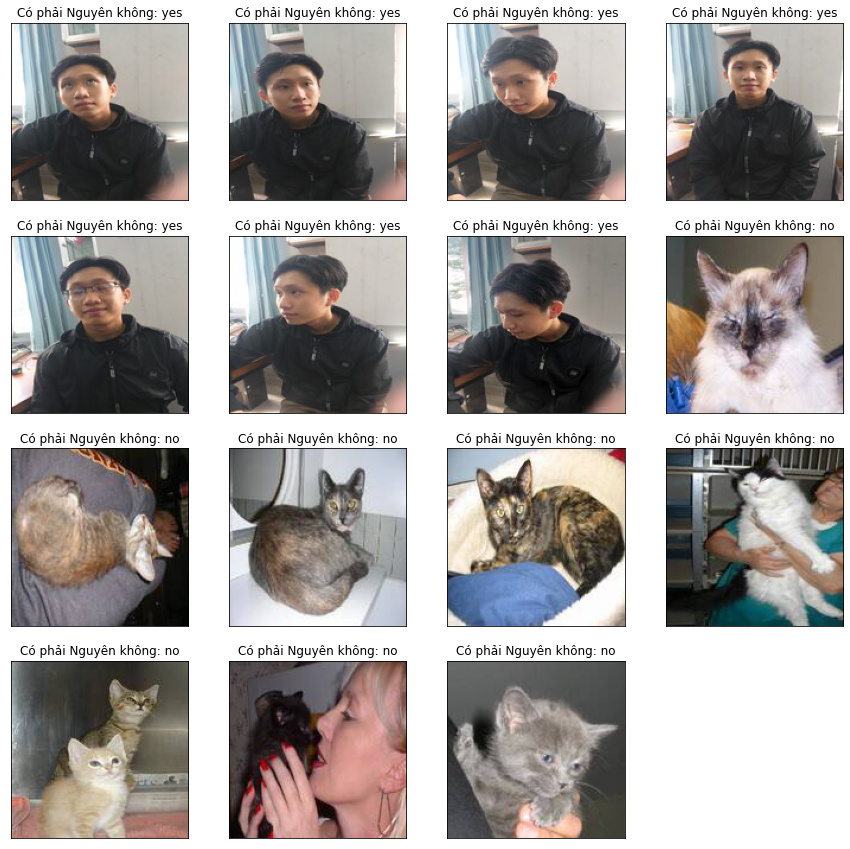

In [532]:
# Cho mô hình predict
plt.figure(figsize=(15, 15))
for i in range(15):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_pred[i], cmap='binary')
    plt.title("Có phải Nguyên không: " + str(hinh[np.argmax(model.predict(x_pred[i].reshape((-1,67500))))]))
plt.show()

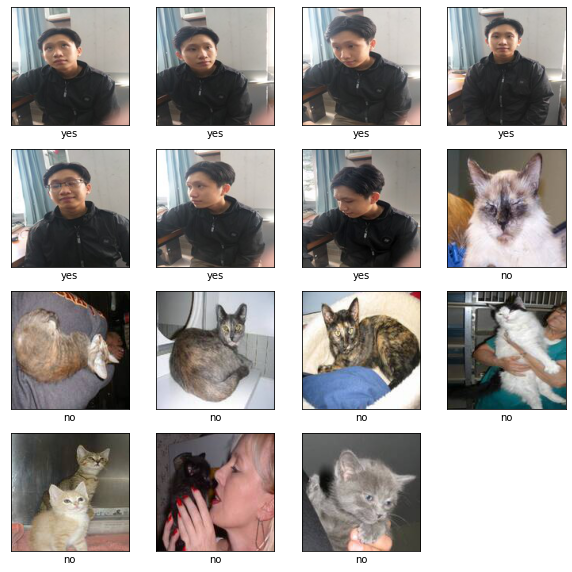

In [533]:
# đáp án
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_pred[i], cmap='binary')
    plt.xlabel(hinh[np.argmax(y_pred[i])])
plt.show()

#BÀI 2: TÌM GÓC QUAY ROBOT 2 BẬC TỰ DO

1. Import thư viện

In [210]:
# thư viện tạo địa chỉ
import os
# thư viện đọc hình ảnh
from PIL import Image
# thư viện để chuyển hình thành array
import numpy as np

import math as m

from keras import models

import pandas as pd

import csv

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt


2. Tính động học thuận để tạo dữ liệu cho việc train model

In [211]:
thuc_nghiem=[]
for i in range(0,180,2):
  arr=[]  # tạo list để chứa hình ảnh của từng folder
  for j in range(0,180,2):
    x=50*m.cos(m.radians(i))+40*m.cos(m.radians(i+j))
    y=50*m.sin(m.radians(i))+40*m.sin(m.radians(i+j))
    arr.append(np.array((i,j,x,y))) # thêm hình ảnh vào list
  thuc_nghiem.extend(arr) # tách hình ảnh vì append chỉ thêm hình không quan tâm dấu phẩy nên thành 1 khối khối


3. Lưu dữ liệu vào file csv và đọc dữ liệu từ file csv

In [212]:
header = ['anpha', 'beta', 'x', 'y']
with open('robot_2b.csv', 'w', encoding='UTF8', newline='') as data_table:
    writer = csv.writer(data_table)
    writer.writerow(header)
    writer.writerows(thuc_nghiem)

In [213]:
data=pd.read_csv('robot_2b.csv')

x=np.array(data.drop(['anpha','beta'],axis=1))
y=np.array(data[['anpha','beta']])

In [214]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

x_train.shape

(7290, 2)

4. Tạo model

In [215]:
model=Sequential()
model.add(Dense(128, activation='relu', input_shape = (2,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(2,  activation='linear'))
model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 128)               384       
                                                                 
 dense_61 (Dense)            (None, 64)                8256      
                                                                 
 dense_62 (Dense)            (None, 32)                2080      
                                                                 
 dense_63 (Dense)            (None, 16)                528       
                                                                 
 dense_64 (Dense)            (None, 2)                 34        
                                                                 
Total params: 11,282
Trainable params: 11,282
Non-trainable params: 0
_________________________________________________________________


5. Train model

In [216]:
model.compile(loss='mse',optimizer=Adam(),metrics=['mean_absolute_error'])
history=model.fit(x_train,y_train,
                  batch_size=200,epochs=1000,verbose=1, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=70)]) #epochs số lần học

Epoch 1/1000
30/30 [==============================] - 1s 8ms/step - loss: 7505.9316 - mean_absolute_error: 69.6809 - val_loss: 4352.7334 - val_mean_absolute_error: 49.6319
Epoch 2/1000
30/30 [==============================] - 0s 4ms/step - loss: 4108.3115 - mean_absolute_error: 46.8198 - val_loss: 3783.4841 - val_mean_absolute_error: 43.1174
Epoch 3/1000
30/30 [==============================] - 0s 4ms/step - loss: 3876.3298 - mean_absolute_error: 43.9736 - val_loss: 3686.4211 - val_mean_absolute_error: 42.4389
Epoch 4/1000
30/30 [==============================] - 0s 4ms/step - loss: 3819.7942 - mean_absolute_error: 43.4942 - val_loss: 3635.6472 - val_mean_absolute_error: 41.9731
Epoch 5/1000
30/30 [==============================] - 0s 4ms/step - loss: 3777.9805 - mean_absolute_error: 43.3143 - val_loss: 3592.5718 - val_mean_absolute_error: 41.5495
Epoch 6/1000
30/30 [==============================] - 0s 4ms/step - loss: 3731.7031 - mean_absolute_error: 43.0428 - val_loss: 3549.9568 - v

6. Kiểm tra model

In [217]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test mean absolute error:',score[1])

Test loss: 5.559443950653076
Test mean absolute error: 1.4048748016357422


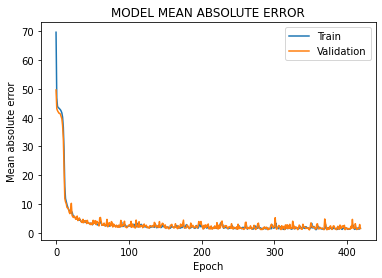

In [218]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('MODEL MEAN ABSOLUTE ERROR')
plt.ylabel('Mean absolute error')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

In [219]:
y_pred=model.predict(x_test)

In [220]:
y_pred[500]

array([ 57.21013, 156.71712], dtype=float32)

In [221]:
y_test[500]

array([ 58., 158.])

#BÀI 3: TÌM GÓC QUAY ROBOT 3 BẬC TỰ DO

1. Import thư viện

In [222]:
# thư viện tạo địa chỉ
import os
# thư viện đọc hình ảnh
from PIL import Image
# thư viện để chuyển hình thành array
import numpy as np

import math as m

from keras import models

import pandas as pd

import csv

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

2. Tính động học thuận

In [223]:
thuc_nghiem=[]
for i in range(0,180,2):
  arr=[]  # tạo list để chứa hình ảnh của từng folder
  for j in range(0,180,2):
    k=180-i-j
    x=50*m.cos(m.radians(i))+40*m.cos(m.radians(i+j))+30*m.cos(m.radians(i+j+k))
    y=50*m.sin(m.radians(i))+40*m.sin(m.radians(i+j))+30*m.sin(m.radians(i+j+k))
    arr.append(np.array((i,j,k,x,y))) # thêm hình ảnh vào list
  thuc_nghiem.extend(arr) # tách hình ảnh vì append chỉ thêm hình không quan tâm dấu phẩy nên thành 1 khối khối

3. Lưu dữ liệu vào file csv và đọc từ file đó

In [224]:
header = ['anpha', 'beta','theta', 'x', 'y']
#header = [ 'x', 'y']
with open('robot_3b.csv', 'w', encoding='UTF8', newline='') as data_table:
    writer = csv.writer(data_table)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(thuc_nghiem)

In [225]:
data=pd.read_csv('robot_3b.csv')

x=np.array(data.drop(['anpha','beta','theta'],axis=1))
y=np.array(data[['anpha','beta','theta']])

In [226]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

x_train.shape

(7290, 2)

4. Tạo model

In [227]:
model=Sequential()
model.add(Dense(128, activation='relu', input_shape = (2,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3,  activation='linear'))
model.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 128)               384       
                                                                 
 dense_66 (Dense)            (None, 64)                8256      
                                                                 
 dense_67 (Dense)            (None, 32)                2080      
                                                                 
 dense_68 (Dense)            (None, 16)                528       
                                                                 
 dense_69 (Dense)            (None, 3)                 51        
                                                                 
Total params: 11,299
Trainable params: 11,299
Non-trainable params: 0
_________________________________________________________________


5. Train model

In [228]:
model.compile(loss='mse',optimizer=Adam(),metrics=['mean_absolute_error'])
history=model.fit(x_train,y_train,
                  batch_size=200,epochs=1000,verbose=1, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=70)]) 

Epoch 1/1000
30/30 [==============================] - 1s 8ms/step - loss: 7613.0000 - mean_absolute_error: 72.3756 - val_loss: 5563.0117 - val_mean_absolute_error: 60.5516
Epoch 2/1000
30/30 [==============================] - 0s 4ms/step - loss: 3495.7798 - mean_absolute_error: 44.5349 - val_loss: 2709.1079 - val_mean_absolute_error: 38.0297
Epoch 3/1000
30/30 [==============================] - 0s 4ms/step - loss: 2494.2883 - mean_absolute_error: 35.1447 - val_loss: 2468.9387 - val_mean_absolute_error: 34.6978
Epoch 4/1000
30/30 [==============================] - 0s 4ms/step - loss: 2387.1580 - mean_absolute_error: 33.3755 - val_loss: 2437.2515 - val_mean_absolute_error: 34.1471
Epoch 5/1000
30/30 [==============================] - 0s 4ms/step - loss: 2368.9509 - mean_absolute_error: 33.1560 - val_loss: 2422.4612 - val_mean_absolute_error: 33.9656
Epoch 6/1000
30/30 [==============================] - 0s 4ms/step - loss: 2354.2437 - mean_absolute_error: 32.9942 - val_loss: 2404.9084 - v

6. Kiểm tra

In [229]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test mean absolute error:',score[1])

Test loss: 4.568968296051025
Test mean absolute error: 1.594289779663086


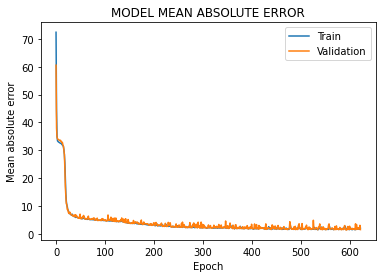

In [230]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('MODEL MEAN ABSOLUTE ERROR')
plt.ylabel('Mean absolute error')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

In [231]:
y_pred=model.predict(x_test)

In [232]:
y_pred[500]

array([121.81151 ,  15.544567,  42.538746], dtype=float32)

In [233]:
y_test[500]

array([120.,  18.,  42.])

#BÀI 4: NHẬN DIỆN KHUÔN MẶT CỦA 3 NGƯỜI (CNN)

1. Import thư viện

In [163]:
# thư viện tạo địa chỉ
import os
# thư viện đọc hình ảnh
from PIL import Image
# thư viện để chuyển hình thành array|
import numpy as np


from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import RMSprop, SGD,Adam
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

2. Tạo catagory thủ công

In [164]:
# tạo catagory
dick={'Duy':[1,0,0],'Nguyen':[0,1,0], 'Hoang':[0,0,1]}

3. Tạo hàm lấy địa chỉ và gán label

In [165]:
# tạo địa chỉ dẫn tới hình ảnh và gán hình ảnh vào biến
def getData(dirData, x):
  for i in os.listdir(dirData):
    i_path=os.path.join(dirData,i) # tạo địa chỉ chỉ tới thư mục
    lst=[]  # tạo list để chứa hình ảnh của từng folder
    for j in os.listdir(i_path):
      j_path=os.path.join(i_path,j) # tạo địa chỉ chỉ tới thư mục
      label=j_path.split('/')[5]
      img=np.array(Image.open(j_path)) # mở hình ảnh, np.array để chuyển thành ma trận giống trong thư viện cifar
      lst.append((img,dick[label])) # thêm hình ảnh vào list
    x.extend(lst) # tách hình ảnh vì append chỉ thêm hình không quan tâm dấu phẩy nên thành 1 khối khối
  return x

4. Lấy ảnh từ địa chỉ cho trước

In [199]:
train='drive/MyDrive/Tri tue nhan tao/hinh_nhom/Train'
test='drive/MyDrive/Tri tue nhan tao/hinh_nhom/Test'
validation='drive/MyDrive/Tri tue nhan tao/hinh_nhom/Validation'

x_train=[]
x_test=[]
x_validation=[]

y_train=[]
y_test=[]
y_validation=[]

x_train=getData(train,x_train)
x_test=getData(test,x_test)
x_validation=getData(validation,x_validation)

for i in range (0,3):
  np.random.shuffle(x_train)

print(len(x_train))
print(len(x_test))
print(len(x_validation))

120
16
22


5. Chiết xuất và xử lý dữ liệu từ dữ liệu đã lấy được

In [200]:
x_train_1=np.array([x[0] for _, x in enumerate(x_train)])
y_train=np.array([x[1] for _, x in enumerate(x_train)])

x_test_1=np.array([x[0] for _, x in enumerate(x_test)])
y_test=np.array([x[1] for _, x in enumerate(x_test)])

x_validation_1=np.array([x[0] for _, x in enumerate(x_validation)])
y_validation=np.array([x[1] for _, x in enumerate(x_validation)])

x_pred=x_test_1
y_pred=y_test

x_train_1=x_train_1.astype('float32')
x_test_1=x_test_1.astype('float32')
x_validation_1=x_validation_1.astype('float32')

x_train_1/=255
x_test_1/=255
x_validation_1/=255

print(x_train_1.shape)
print(x_test_1.shape)
print(x_validation_1.shape)

(120, 150, 150, 3)
(16, 150, 150, 3)
(22, 150, 150, 3)


6. Tạo model 

In [201]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(MaxPooling2D((2,2)))

model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(MaxPooling2D((2,2)))

model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3,activation='softmax'))


7. Train model

In [202]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train_1,y_train,epochs=500,batch_size=128,validation_data=(x_validation_1,y_validation),verbose=1,callbacks=[EarlyStopping(monitor='val_loss',patience=50)])

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 1.2595 - accuracy: 0.1250 - val_loss: 99.9254 - val_accuracy: 0.3636
Epoch 2/500
1/1 [==============================] - 1s 653ms/step - loss: 91.4672 - accuracy: 0.3333 - val_loss: 48.1123 - val_accuracy: 0.6364
Epoch 3/500
1/1 [==============================] - 1s 674ms/step - loss: 48.3091 - accuracy: 0.5833 - val_loss: 29.3434 - val_accuracy: 0.1818
Epoch 4/500
1/1 [==============================] - 1s 667ms/step - loss: 17.0793 - accuracy: 0.5667 - val_loss: 6.1571 - val_accuracy: 0.5455
Epoch 5/500
1/1 [==============================] - 1s 653ms/step - loss: 3.3627 - accuracy: 0.6583 - val_loss: 4.4651 - val_accuracy: 0.5455
Epoch 6/500
1/1 [==============================] - 1s 672ms/step - loss: 2.2684 - accuracy: 0.6417 - val_loss: 0.4326 - val_accuracy: 0.8636
Epoch 7/500
1/1 [==============================] - 1s 659ms/step - loss: 0.5001 - accuracy: 0.7750 - val_loss: 0.6666 - val_accuracy: 0.6364
Epoch 8/50

8. Kiểm tra

In [203]:
Score=model.evaluate(x_test_1,y_test,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

Test loss 0.0009088708320632577
Test accuary 1.0


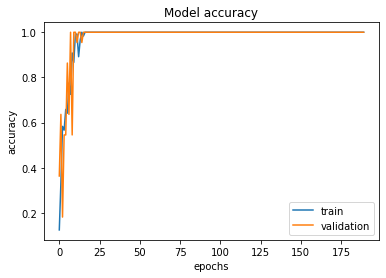

In [204]:
plt.plot(history.history['accuracy'])
plt.plot(history. history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'])
plt.show()

In [205]:
model.save('bai4.h5')

In [206]:
model_CNN=load_model('bai4.h5')

In [207]:
hinh=['Duy','Nguyen', 'Hoang']

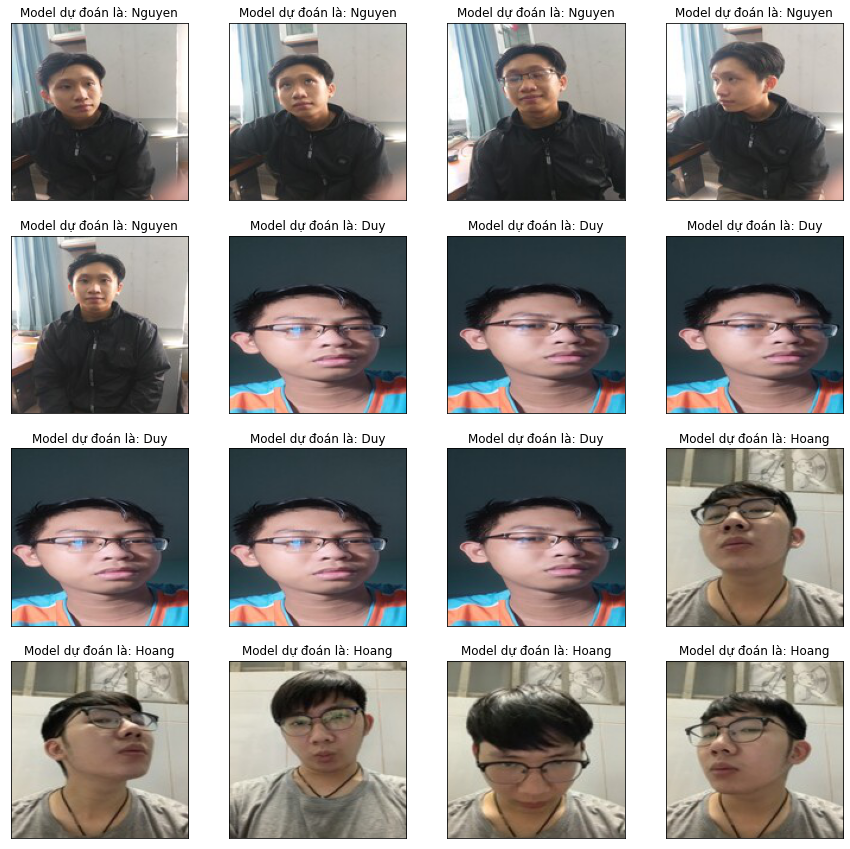

In [208]:
plt.figure(figsize=(15, 15))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_pred[i], cmap='binary')
    plt.title("Model dự đoán là: " + str(hinh[np.argmax(model_CNN.predict(x_pred[i].reshape((-1,150,150,3,))))]))
plt.show()

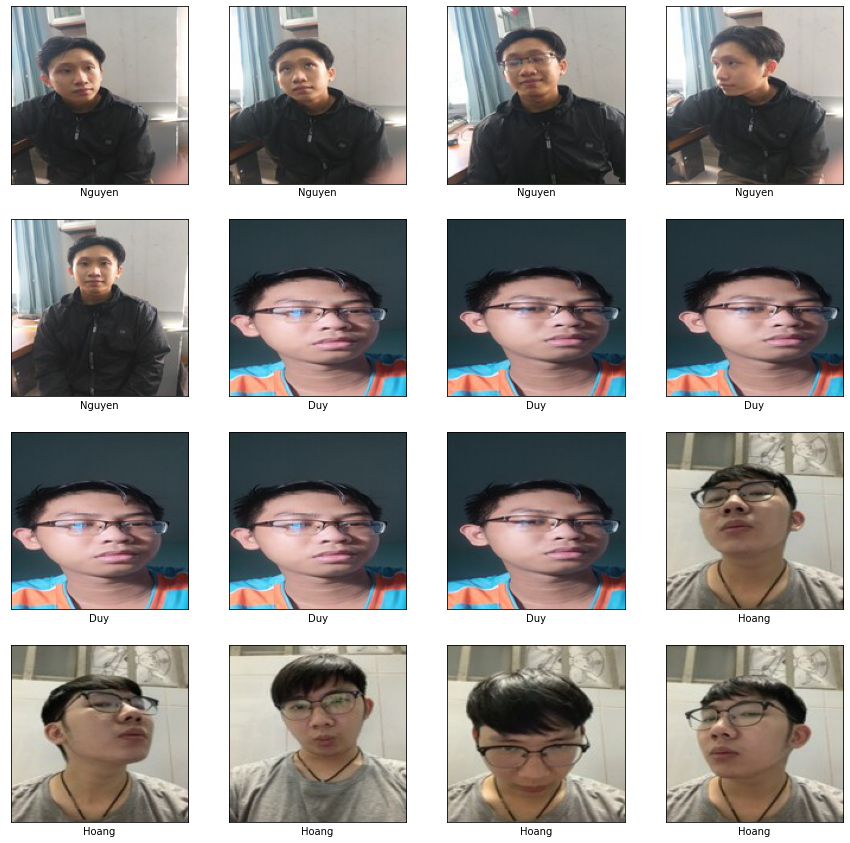

In [209]:
plt.figure(figsize=(15, 15))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_pred[i], cmap='binary')
    plt.xlabel(hinh[np.argmax(y_pred[i])])
plt.show()